# 1D CNNs with SMOTE

In [23]:
# enable auto-reloading submodules
%reload_ext autoreload
%autoreload 2

# hidpi plots for retina displays
%config InlineBackend.figure_format = 'retina'

from trainer import Trainer

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Activation, Flatten
from keras.callbacks import EarlyStopping

## Shared Parameters

In [24]:
# DRIAMS sites and years
sites = ['A']
years = [2015, 2016, 2017, 2018]
# list of callbacks to apply during training
cnn_callbacks = [
    EarlyStopping(monitor='binary_accuracy', patience=3, verbose=0),
]

## 1D CNN Model

In [25]:
def build_cnn_1d():
    kernel_size = 60
    # 1D CNN model based on <https://github.com/chenlabgccri/CancerTypePrediction/blob/master/5cv_34class/5cv_1D_CNN_34class.py>
    model = Sequential()
    ## *********** First layer Conv
    model.add(Conv1D(
        filters=32,
        kernel_size=kernel_size,
        strides=kernel_size, # stride == kernel length
        input_shape=(6000, 1),
    ))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(2, padding='same'))
    ## ********* Classification layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['binary_accuracy'],
    )

    return model

## E. Coli

In [26]:
ecoli_trainer = Trainer(
    pathogen='Escherichia coli',
    n_splits=5,
    sites=sites,
    years=years,
)

ecoli_drugs = [
    'Ceftriaxone',
    'Ciprofloxacin',
    'Cefepime',
    'Piperacillin-Tazobactam',
    'Tobramycin',
]

for drug in ecoli_drugs:
    ecoli_trainer.fit(
        drug=drug,
        model=build_cnn_1d(),
        # params for `model.fit()`
        epochs=20,
        validation_split=0.2,
        # callbacks=cnn_callbacks,
    )

# collect results
ecoli_results = ecoli_trainer.collect_results()
ecoli_results.save_to('./results/1d_cnn/ecoli')

Loading Ceftriaxone...
Training w/o SMOTE...


INFO:tensorflow:Assets written to: ram://4932ad14-d1ff-4fe3-a8af-b592aeec2d7a/assets


INFO:tensorflow:Assets written to: ram://4932ad14-d1ff-4fe3-a8af-b592aeec2d7a/assets


Fold 1/5...
Epoch 1/20
100/100 [==============================] - 2s 11ms/step - loss: 0.5520 - binary_accuracy: 0.7728 - val_loss: 0.5022 - val_binary_accuracy: 0.8149
Epoch 2/20
100/100 [==============================] - 1s 10ms/step - loss: 0.5401 - binary_accuracy: 0.7728 - val_loss: 0.5081 - val_binary_accuracy: 0.8149
Epoch 3/20
100/100 [==============================] - 1s 12ms/step - loss: 0.5387 - binary_accuracy: 0.7728 - val_loss: 0.5016 - val_binary_accuracy: 0.8149
Epoch 4/20
100/100 [==============================] - 1s 13ms/step - loss: 0.5378 - binary_accuracy: 0.7728 - val_loss: 0.4807 - val_binary_accuracy: 0.8149
Epoch 5/20
100/100 [==============================] - 1s 12ms/step - loss: 0.5411 - binary_accuracy: 0.7728 - val_loss: 0.4798 - val_binary_accuracy: 0.8149
Epoch 6/20
100/100 [==============================] - 1s 11ms/step - loss: 0.5384 - binary_accuracy: 0.7728 - val_loss: 0.4897 - val_binary_accuracy: 0.8149
Epoch 7/20
100/100 [==========================

INFO:tensorflow:Assets written to: ram://d69989ed-651d-4775-8aae-a26c60e29736/assets


INFO:tensorflow:Assets written to: ram://d69989ed-651d-4775-8aae-a26c60e29736/assets


Fold 1/5...
Epoch 1/20
155/155 [==============================] - 2s 9ms/step - loss: 0.6642 - binary_accuracy: 0.6250 - val_loss: 0.8789 - val_binary_accuracy: 0.0000e+00
Epoch 2/20
155/155 [==============================] - 1s 8ms/step - loss: 0.6637 - binary_accuracy: 0.6250 - val_loss: 1.0348 - val_binary_accuracy: 0.0000e+00
Epoch 3/20
155/155 [==============================] - 1s 8ms/step - loss: 0.6623 - binary_accuracy: 0.6250 - val_loss: 1.1259 - val_binary_accuracy: 0.0000e+00
Epoch 4/20
155/155 [==============================] - 1s 9ms/step - loss: 0.6617 - binary_accuracy: 0.6250 - val_loss: 0.9189 - val_binary_accuracy: 0.0000e+00
Epoch 5/20
155/155 [==============================] - 1s 8ms/step - loss: 0.6568 - binary_accuracy: 0.6250 - val_loss: 1.0344 - val_binary_accuracy: 0.0000e+00
Epoch 6/20
155/155 [==============================] - 1s 9ms/step - loss: 0.6429 - binary_accuracy: 0.6250 - val_loss: 0.9946 - val_binary_accuracy: 0.0000e+00
Epoch 7/20
155/155 [========

INFO:tensorflow:Assets written to: ram://cf7405b2-02bd-460b-a133-7fc084552a29/assets


INFO:tensorflow:Assets written to: ram://cf7405b2-02bd-460b-a133-7fc084552a29/assets


Fold 1/5...
Epoch 1/20
97/97 [==============================] - 1s 9ms/step - loss: 0.6127 - binary_accuracy: 0.7111 - val_loss: 0.5817 - val_binary_accuracy: 0.7328
Epoch 2/20
97/97 [==============================] - 1s 8ms/step - loss: 0.6034 - binary_accuracy: 0.7111 - val_loss: 0.5805 - val_binary_accuracy: 0.7328
Epoch 3/20
97/97 [==============================] - 1s 7ms/step - loss: 0.6045 - binary_accuracy: 0.7111 - val_loss: 0.5886 - val_binary_accuracy: 0.7328
Epoch 4/20
97/97 [==============================] - 1s 8ms/step - loss: 0.6040 - binary_accuracy: 0.7111 - val_loss: 0.5821 - val_binary_accuracy: 0.7328
Epoch 5/20
97/97 [==============================] - 1s 8ms/step - loss: 0.6025 - binary_accuracy: 0.7111 - val_loss: 0.5838 - val_binary_accuracy: 0.7328
Epoch 6/20
97/97 [==============================] - 1s 8ms/step - loss: 0.6031 - binary_accuracy: 0.7111 - val_loss: 0.5805 - val_binary_accuracy: 0.7328
Epoch 7/20
97/97 [==============================] - 1s 7ms/step 

INFO:tensorflow:Assets written to: ram://84ecb82e-9550-4d9a-a867-b1b047362244/assets


INFO:tensorflow:Assets written to: ram://84ecb82e-9550-4d9a-a867-b1b047362244/assets


Fold 1/5...
Epoch 1/20
138/138 [==============================] - 2s 9ms/step - loss: 0.6647 - binary_accuracy: 0.6251 - val_loss: 0.9357 - val_binary_accuracy: 0.0000e+00
Epoch 2/20
138/138 [==============================] - 1s 8ms/step - loss: 0.6636 - binary_accuracy: 0.6251 - val_loss: 0.9860 - val_binary_accuracy: 0.0000e+00
Epoch 3/20
138/138 [==============================] - 1s 8ms/step - loss: 0.6636 - binary_accuracy: 0.6251 - val_loss: 0.9742 - val_binary_accuracy: 0.0000e+00
Epoch 4/20
138/138 [==============================] - 1s 8ms/step - loss: 0.6625 - binary_accuracy: 0.6251 - val_loss: 0.9851 - val_binary_accuracy: 0.0000e+00
Epoch 5/20
138/138 [==============================] - 1s 8ms/step - loss: 0.6625 - binary_accuracy: 0.6251 - val_loss: 0.9086 - val_binary_accuracy: 0.0000e+00
Epoch 6/20
138/138 [==============================] - 1s 8ms/step - loss: 0.6624 - binary_accuracy: 0.6251 - val_loss: 0.9865 - val_binary_accuracy: 0.0000e+00
Epoch 7/20
138/138 [========

INFO:tensorflow:Assets written to: ram://d7091c66-38bc-4285-a4b7-4a455e41e192/assets


INFO:tensorflow:Assets written to: ram://d7091c66-38bc-4285-a4b7-4a455e41e192/assets


Fold 1/5...
Epoch 1/20
88/88 [==============================] - 1s 9ms/step - loss: 0.3462 - binary_accuracy: 0.9102 - val_loss: 0.2290 - val_binary_accuracy: 0.9459
Epoch 2/20
88/88 [==============================] - 1s 7ms/step - loss: 0.2878 - binary_accuracy: 0.9180 - val_loss: 0.2127 - val_binary_accuracy: 0.9459
Epoch 3/20
88/88 [==============================] - 1s 8ms/step - loss: 0.2876 - binary_accuracy: 0.9180 - val_loss: 0.2238 - val_binary_accuracy: 0.9459
Epoch 4/20
88/88 [==============================] - 1s 7ms/step - loss: 0.2870 - binary_accuracy: 0.9180 - val_loss: 0.2156 - val_binary_accuracy: 0.9459
Epoch 5/20
88/88 [==============================] - 1s 8ms/step - loss: 0.2873 - binary_accuracy: 0.9180 - val_loss: 0.2181 - val_binary_accuracy: 0.9459
Epoch 6/20
88/88 [==============================] - 1s 7ms/step - loss: 0.2861 - binary_accuracy: 0.9180 - val_loss: 0.2198 - val_binary_accuracy: 0.9459
Epoch 7/20
88/88 [==============================] - 1s 7ms/step 

INFO:tensorflow:Assets written to: ram://7918eb3f-f20c-4af7-9b29-3bc1e8c80d40/assets


INFO:tensorflow:Assets written to: ram://7918eb3f-f20c-4af7-9b29-3bc1e8c80d40/assets


Fold 1/5...
Epoch 1/20
162/162 [==============================] - 2s 7ms/step - loss: 0.6647 - binary_accuracy: 0.6235 - val_loss: 1.0208 - val_binary_accuracy: 0.0000e+00
Epoch 2/20
162/162 [==============================] - 1s 7ms/step - loss: 0.6624 - binary_accuracy: 0.6250 - val_loss: 1.0042 - val_binary_accuracy: 0.0000e+00
Epoch 3/20
162/162 [==============================] - 1s 7ms/step - loss: 0.6615 - binary_accuracy: 0.6250 - val_loss: 0.9806 - val_binary_accuracy: 0.0000e+00
Epoch 4/20
162/162 [==============================] - 1s 7ms/step - loss: 0.6562 - binary_accuracy: 0.6250 - val_loss: 1.0061 - val_binary_accuracy: 0.0000e+00
Epoch 5/20
162/162 [==============================] - 1s 7ms/step - loss: 0.6221 - binary_accuracy: 0.6275 - val_loss: 0.7734 - val_binary_accuracy: 0.5147
Epoch 6/20
162/162 [==============================] - 2s 12ms/step - loss: 0.5671 - binary_accuracy: 0.6939 - val_loss: 1.0769 - val_binary_accuracy: 0.1929
Epoch 7/20
162/162 [===============

INFO:tensorflow:Assets written to: ram://dbfb415b-2c84-4e1a-9500-98c27925c480/assets


INFO:tensorflow:Assets written to: ram://dbfb415b-2c84-4e1a-9500-98c27925c480/assets


Fold 1/5...
Epoch 1/20
96/96 [==============================] - 1s 9ms/step - loss: 0.2767 - binary_accuracy: 0.9399 - val_loss: 0.3355 - val_binary_accuracy: 0.8988
Epoch 2/20
96/96 [==============================] - 1s 8ms/step - loss: 0.2160 - binary_accuracy: 0.9448 - val_loss: 0.3291 - val_binary_accuracy: 0.8988
Epoch 3/20
96/96 [==============================] - 1s 9ms/step - loss: 0.2219 - binary_accuracy: 0.9448 - val_loss: 0.3338 - val_binary_accuracy: 0.8988
Epoch 4/20
96/96 [==============================] - 1s 8ms/step - loss: 0.2182 - binary_accuracy: 0.9448 - val_loss: 0.3280 - val_binary_accuracy: 0.8988
Epoch 5/20
96/96 [==============================] - 1s 7ms/step - loss: 0.2157 - binary_accuracy: 0.9448 - val_loss: 0.3277 - val_binary_accuracy: 0.8988
Epoch 6/20
96/96 [==============================] - 1s 7ms/step - loss: 0.2150 - binary_accuracy: 0.9448 - val_loss: 0.3353 - val_binary_accuracy: 0.8988
Epoch 7/20
96/96 [==============================] - 1s 7ms/step 

INFO:tensorflow:Assets written to: ram://88469a89-fd38-4914-8519-80aa5e3fb6e1/assets


INFO:tensorflow:Assets written to: ram://88469a89-fd38-4914-8519-80aa5e3fb6e1/assets


Fold 1/5...
Epoch 1/20
178/178 [==============================] - 2s 10ms/step - loss: 0.6641 - binary_accuracy: 0.6245 - val_loss: 1.0710 - val_binary_accuracy: 0.0000e+00
Epoch 2/20
178/178 [==============================] - 2s 9ms/step - loss: 0.6645 - binary_accuracy: 0.6250 - val_loss: 0.9611 - val_binary_accuracy: 0.0000e+00
Epoch 3/20
178/178 [==============================] - 1s 8ms/step - loss: 0.6621 - binary_accuracy: 0.6250 - val_loss: 0.9559 - val_binary_accuracy: 0.0000e+00
Epoch 4/20
178/178 [==============================] - 1s 8ms/step - loss: 0.6612 - binary_accuracy: 0.6250 - val_loss: 0.9883 - val_binary_accuracy: 0.0000e+00
Epoch 5/20
178/178 [==============================] - 1s 8ms/step - loss: 0.6547 - binary_accuracy: 0.6250 - val_loss: 0.9741 - val_binary_accuracy: 0.0000e+00
Epoch 6/20
178/178 [==============================] - 1s 8ms/step - loss: 0.6407 - binary_accuracy: 0.6257 - val_loss: 1.0415 - val_binary_accuracy: 0.0021
Epoch 7/20
178/178 [===========

INFO:tensorflow:Assets written to: ram://43de6a7b-627b-418a-9855-5a9b161d8687/assets


INFO:tensorflow:Assets written to: ram://43de6a7b-627b-418a-9855-5a9b161d8687/assets


Fold 1/5...
Epoch 1/20
97/97 [==============================] - 1s 10ms/step - loss: 0.4161 - binary_accuracy: 0.8661 - val_loss: 0.3554 - val_binary_accuracy: 0.8903
Epoch 2/20
97/97 [==============================] - 1s 9ms/step - loss: 0.3871 - binary_accuracy: 0.8716 - val_loss: 0.3458 - val_binary_accuracy: 0.8903
Epoch 3/20
97/97 [==============================] - 1s 10ms/step - loss: 0.3871 - binary_accuracy: 0.8716 - val_loss: 0.3479 - val_binary_accuracy: 0.8903
Epoch 4/20
97/97 [==============================] - 1s 9ms/step - loss: 0.3854 - binary_accuracy: 0.8716 - val_loss: 0.3492 - val_binary_accuracy: 0.8903
Epoch 5/20
97/97 [==============================] - 1s 8ms/step - loss: 0.3842 - binary_accuracy: 0.8716 - val_loss: 0.3786 - val_binary_accuracy: 0.8903
Epoch 6/20
97/97 [==============================] - 1s 10ms/step - loss: 0.3889 - binary_accuracy: 0.8716 - val_loss: 0.3479 - val_binary_accuracy: 0.8903
Epoch 7/20
97/97 [==============================] - 1s 8ms/st

INFO:tensorflow:Assets written to: ram://800592bf-ba8d-4c80-b367-be9f990df986/assets


INFO:tensorflow:Assets written to: ram://800592bf-ba8d-4c80-b367-be9f990df986/assets


Fold 1/5...
Epoch 1/20
170/170 [==============================] - 2s 9ms/step - loss: 0.6644 - binary_accuracy: 0.6245 - val_loss: 0.9095 - val_binary_accuracy: 0.0000e+00
Epoch 2/20
170/170 [==============================] - 1s 7ms/step - loss: 0.6629 - binary_accuracy: 0.6250 - val_loss: 0.9720 - val_binary_accuracy: 0.0000e+00
Epoch 3/20
170/170 [==============================] - 1s 7ms/step - loss: 0.6616 - binary_accuracy: 0.6250 - val_loss: 0.8734 - val_binary_accuracy: 0.0000e+00
Epoch 4/20
170/170 [==============================] - 1s 7ms/step - loss: 0.6632 - binary_accuracy: 0.6250 - val_loss: 0.9298 - val_binary_accuracy: 0.0000e+00
Epoch 5/20
170/170 [==============================] - 1s 7ms/step - loss: 0.6606 - binary_accuracy: 0.6250 - val_loss: 0.9668 - val_binary_accuracy: 0.0000e+00
Epoch 6/20
170/170 [==============================] - 1s 7ms/step - loss: 0.6585 - binary_accuracy: 0.6250 - val_loss: 0.9660 - val_binary_accuracy: 0.0000e+00
Epoch 7/20
170/170 [========

### Bar Graph (E. Coli)

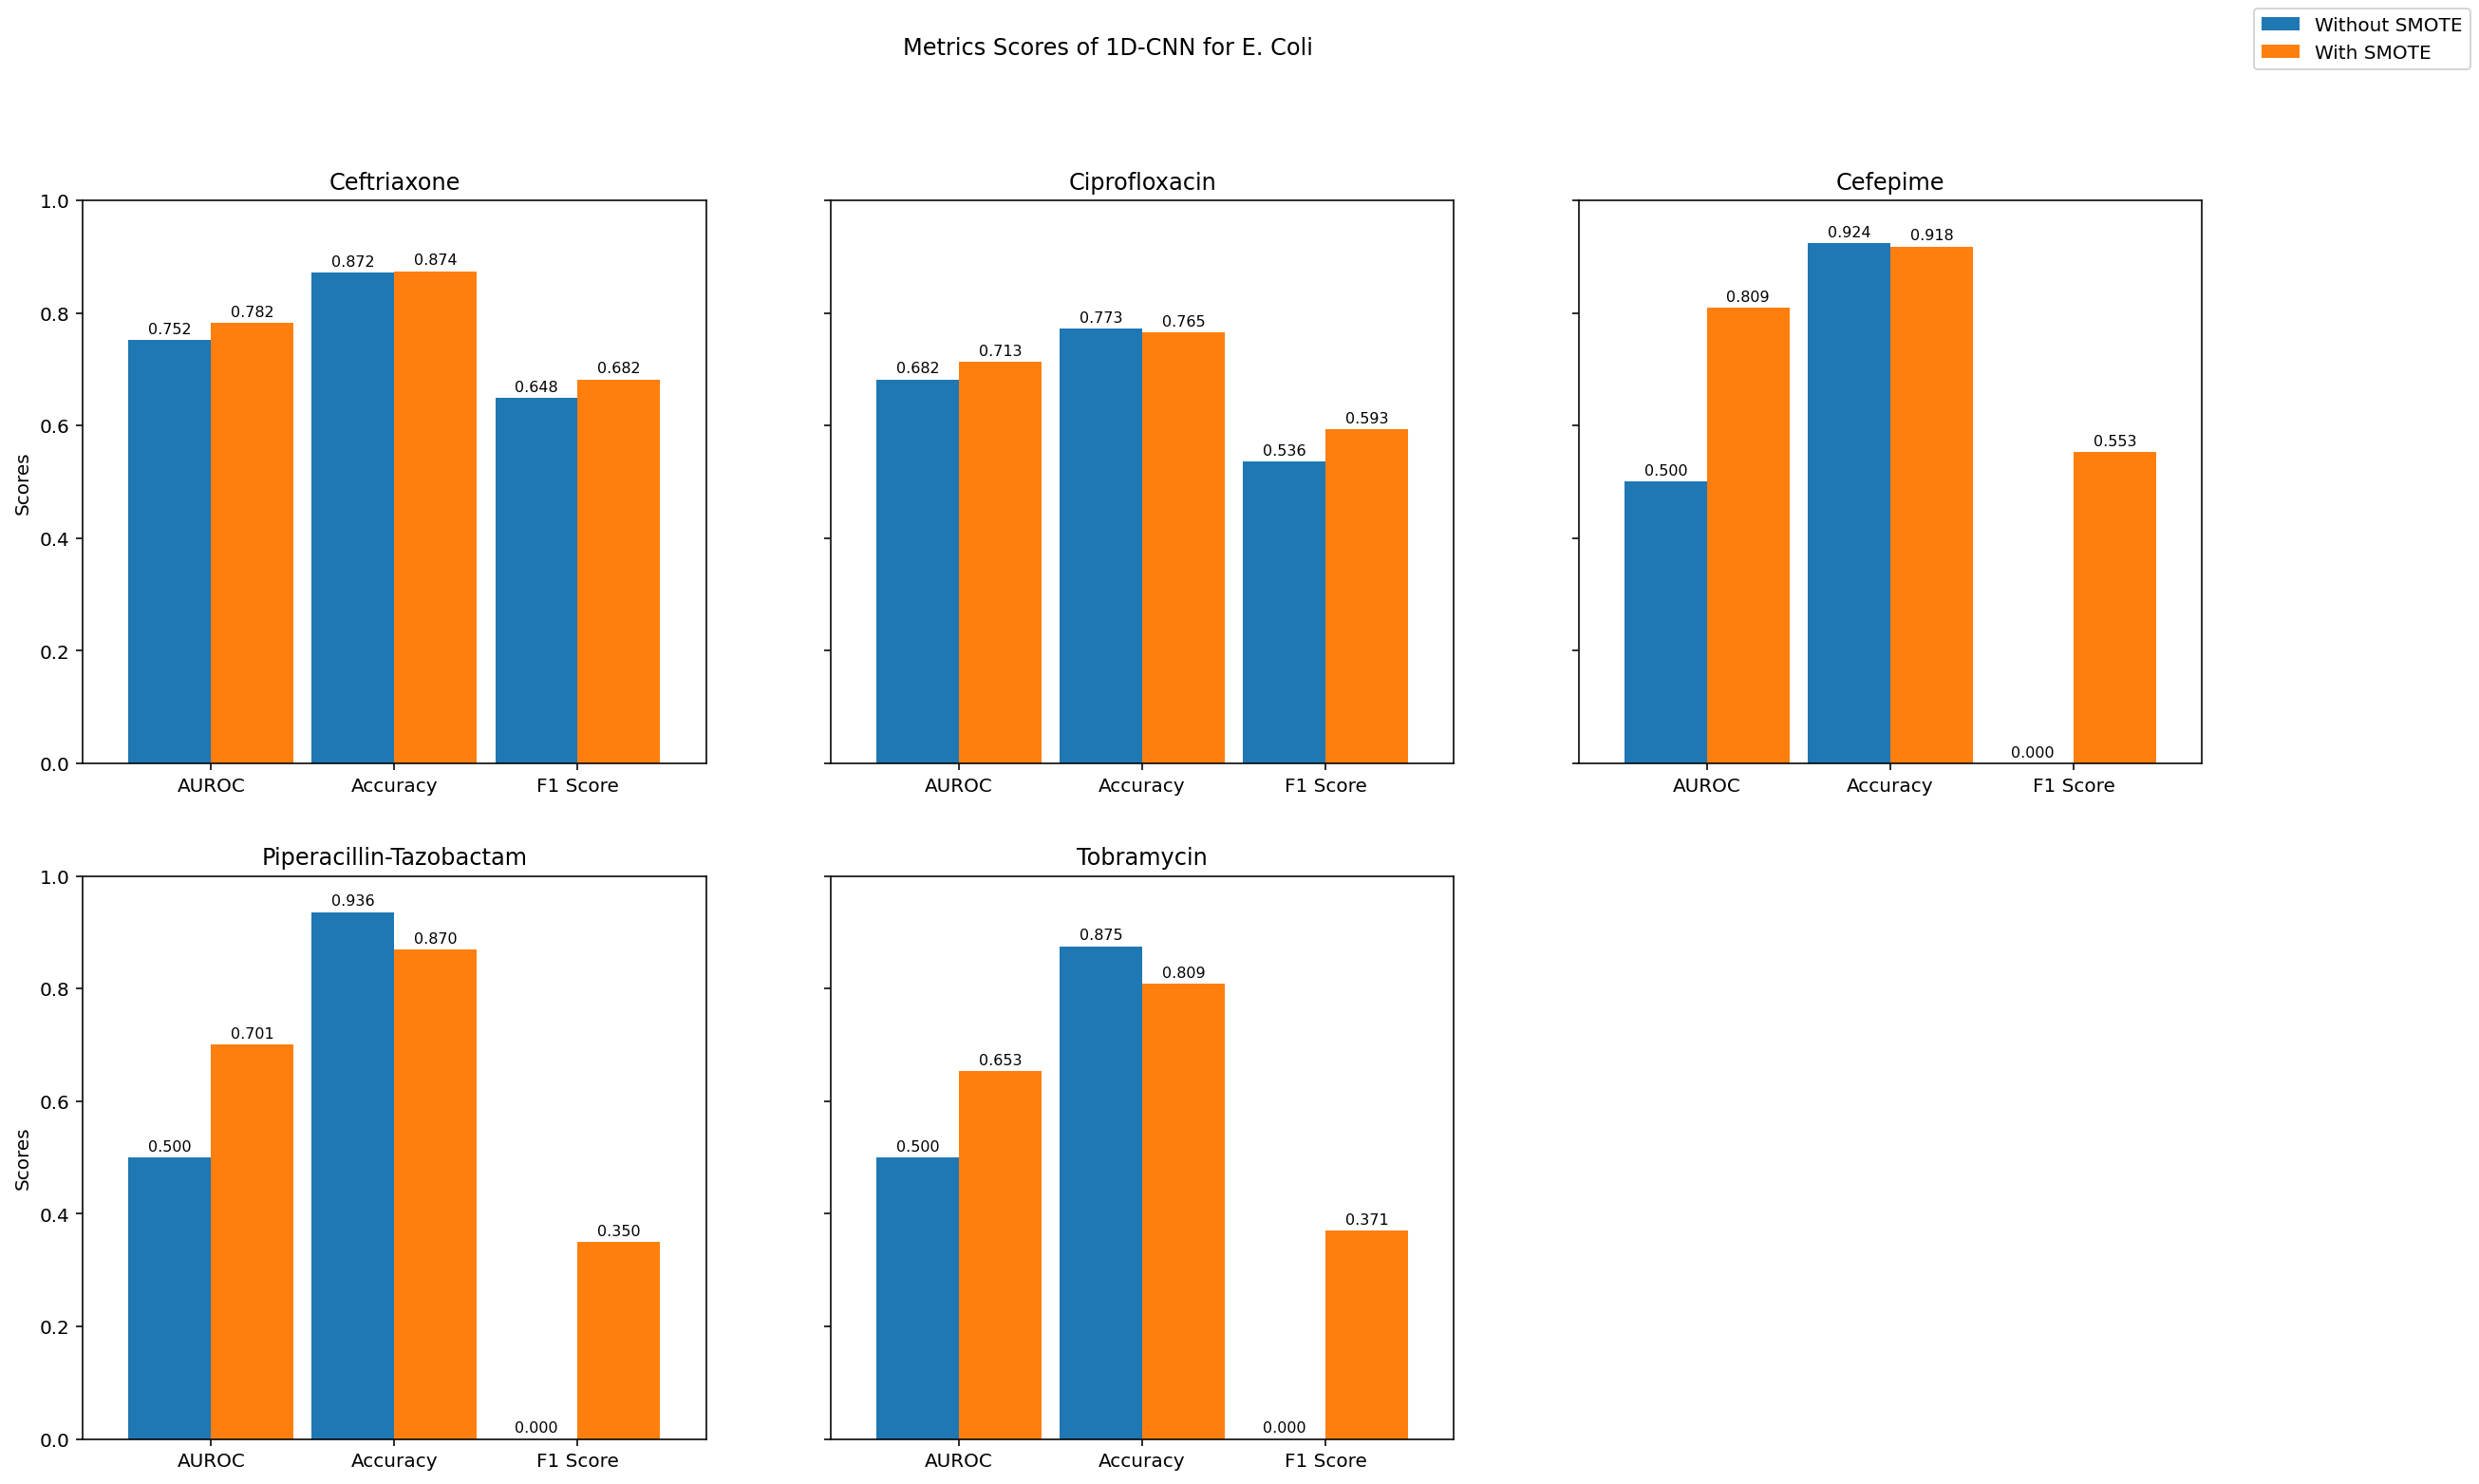

In [27]:
ecoli_results.bar_plot(
    title='Metrics Scores of 1D-CNN for E. Coli',
    save_as='./results/1d_cnn/ecoli/bar.png',
    nrows=2,
    ncols=3,
    sharey=True,
    figsize=(20, 12),
    y_lim=(0, 1),
)

### Box Graph (E. Coli)

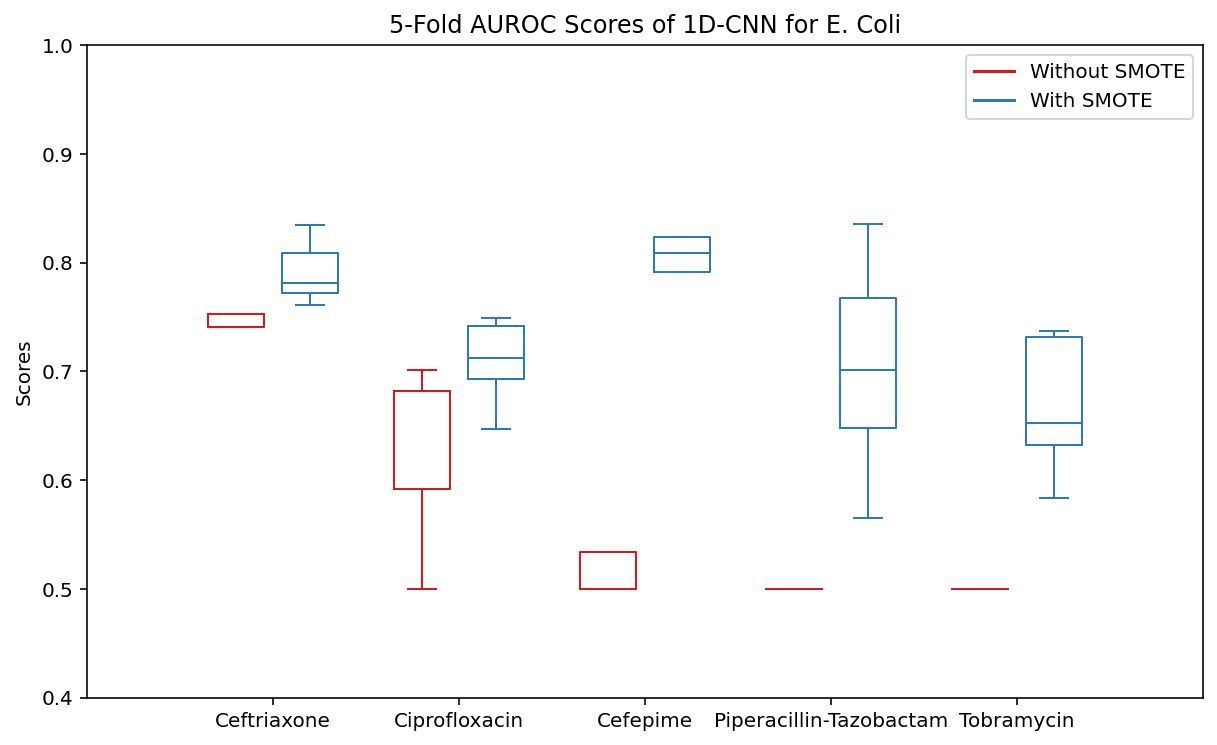

In [29]:
ecoli_results.box_plot(
    save_as='./results/1d_cnn/ecoli/box.png',
    # format subtitles (`{}` will be replaced with metrics' name)
    subtitle_template='5-Fold {} Scores of 1D-CNN for E. Coli',
    # plot AUROC only
    metrics=['AUROC'],
    # set view limits for y-axis
    y_lim=(0.4, 1.0),
    figsize=(10, 6),
)
